In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 5GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/gender-classification/Transformed Data Set - Sheet1.csv


In [2]:
filepath = '../input/gender-classification/Transformed Data Set - Sheet1.csv'
df = pd.read_csv(filepath)
df 

,Favorite Color,Favorite Music Genre,Favorite Beverage,Favorite Soft Drink,Gender
0,Cool,Rock,Vodka,7UP/Sprite,F
1,Neutral,Hip hop,Vodka,Coca Cola/Pepsi,F
2,Warm,Rock,Wine,Coca Cola/Pepsi,F
3,Warm,Folk/Traditional,Whiskey,Fanta,F
4,Cool,Rock,Vodka,Coca Cola/Pepsi,F
...,...,...,...,...,...
61,Cool,Rock,Vodka,Coca Cola/Pepsi,M
62,Cool,Hip hop,Beer,Coca Cola/Pepsi,M
63,Neutral,Hip hop,Doesn't drink,Fanta,M
64,Cool,Rock,Wine,Coca Cola/Pepsi,M


In [3]:
target_col = 'Gender'
df[target_col].unique()

array(['F', 'M'], dtype=object)

In [4]:
df[target_col].value_counts()

F    33
M    33
Name: Gender, dtype: int64

In [5]:
df.isna().sum()

Favorite Color          0
Favorite Music Genre    0
Favorite Beverage       0
Favorite Soft Drink     0
Gender                  0
dtype: int64

In [6]:
for col in df:
    print(col, ':', df[col].unique())

Favorite Color : ['Cool' 'Neutral' 'Warm']
Favorite Music Genre : ['Rock' 'Hip hop' 'Folk/Traditional' 'Jazz/Blues' 'Pop' 'Electronic'
 'R&B and soul']
Favorite Beverage : ['Vodka' 'Wine' 'Whiskey' "Doesn't drink" 'Beer' 'Other']
Favorite Soft Drink : ['7UP/Sprite' 'Coca Cola/Pepsi' 'Fanta' 'Other']
Gender : ['F' 'M']


In [7]:
from sklearn.preprocessing import LabelEncoder
df = df.apply(LabelEncoder().fit_transform)
df

,Favorite Color,Favorite Music Genre,Favorite Beverage,Favorite Soft Drink,Gender
0,0,6,3,0,0
1,1,2,3,1,0
2,2,6,5,1,0
3,2,1,4,2,0
4,0,6,3,1,0
...,...,...,...,...,...
61,0,6,3,1,1
62,0,2,0,1,1
63,1,2,1,2,1
64,0,6,5,1,1


In [8]:
y = df[target_col]
X = df.drop(columns=[target_col])
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y)

In [9]:
para = list(range(3, 10, 2))
print(para)

[3, 5, 7, 9]


In [10]:
df.dtypes

Favorite Color          int64
Favorite Music Genre    int64
Favorite Beverage       int64
Favorite Soft Drink     int64
Gender                  int64
dtype: object

In [11]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, accuracy_score, f1_score
results = {}
for n in para:
    print('para=', n)
    model = KNeighborsClassifier(n_neighbors=n)
    model.fit(X_train, y_train)
    preds = model.predict(X_test)
    accu = accuracy_score(y_true=y_test, y_pred=preds)
    f1 = f1_score(y_true=y_test, y_pred=preds)
    print(classification_report(y_true=y_test, y_pred=preds))
    print('--------------------------')
    results[n] = f1

para= 3
              precision    recall  f1-score   support

           0       0.67      0.67      0.67         9
           1       0.62      0.62      0.62         8

    accuracy                           0.65        17
   macro avg       0.65      0.65      0.65        17
weighted avg       0.65      0.65      0.65        17

--------------------------
para= 5
              precision    recall  f1-score   support

           0       0.71      0.56      0.63         9
           1       0.60      0.75      0.67         8

    accuracy                           0.65        17
   macro avg       0.66      0.65      0.65        17
weighted avg       0.66      0.65      0.64        17

--------------------------
para= 7
              precision    recall  f1-score   support

           0       0.71      0.56      0.63         9
           1       0.60      0.75      0.67         8

    accuracy                           0.65        17
   macro avg       0.66      0.65      0.65       

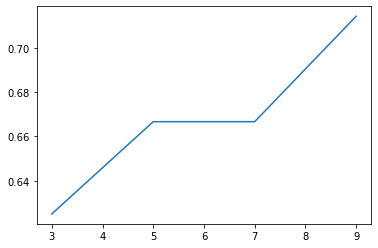

In [12]:
import matplotlib.pylab as plt
# sorted by key, return a list of tuples
lists = sorted(results.items()) 
p, a = zip(*lists) # unpack a list of pairs into two tuples
plt.plot(p, a)
plt.show()